In [2]:
import tensorflow as tenFlow
import cv2
import os
import matplotlib.pyplot as plot
import numpy as npy

In [2]:
img_array = cv2.imread("train/1/Training_659019.jpg")

In [3]:
img_array.shape

(48, 48, 3)

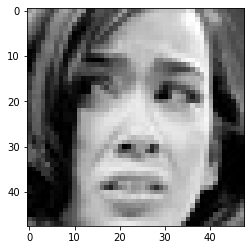

In [4]:
plot.imshow(img_array)

In [3]:
Datadirectory = "train/"

In [4]:
 Classes = ["0", "1", "2", "3", "4", "5", "6"]

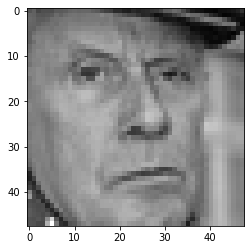

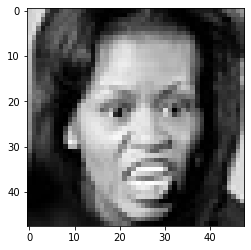

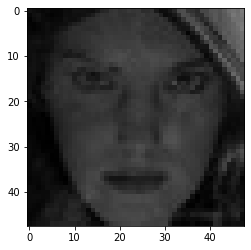

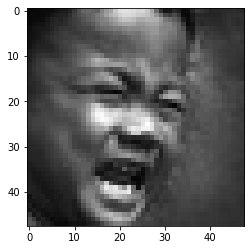

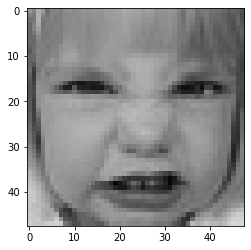

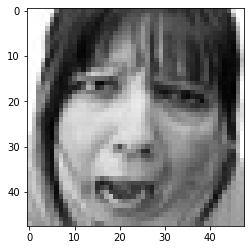

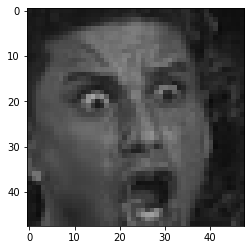

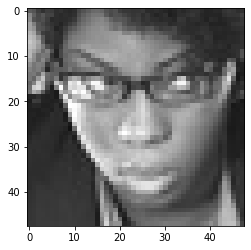

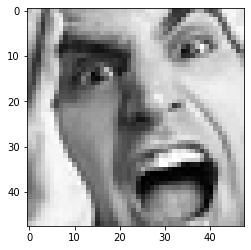

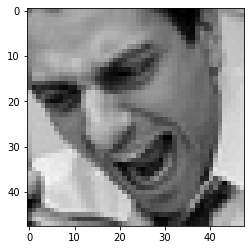

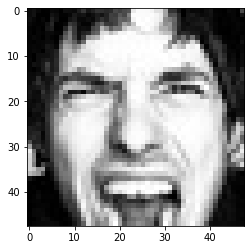

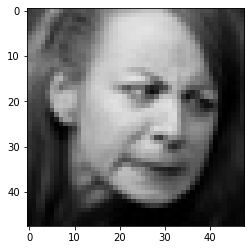

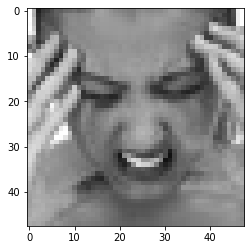

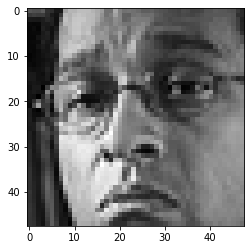

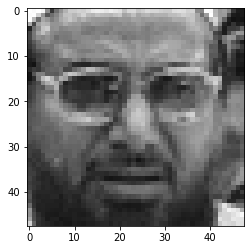

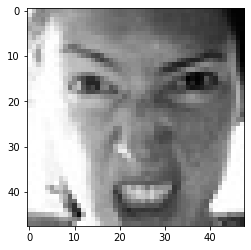

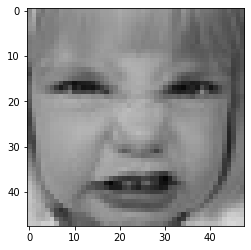

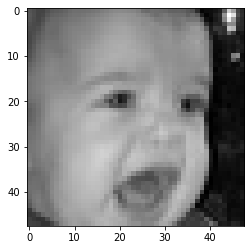

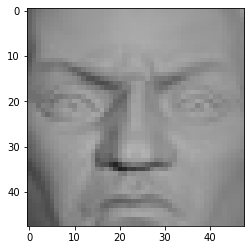

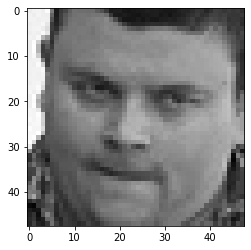

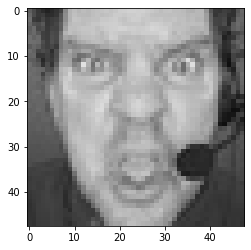

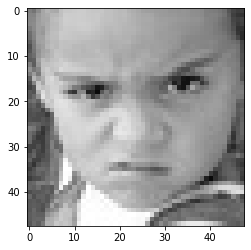

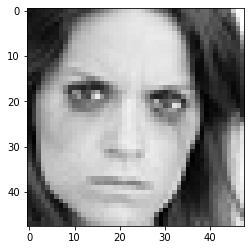

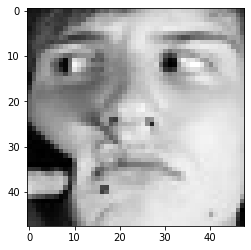

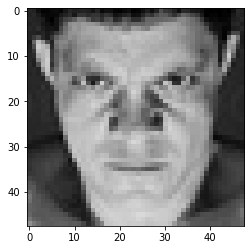

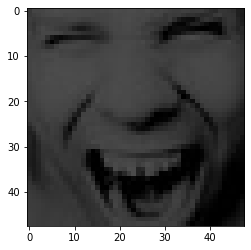

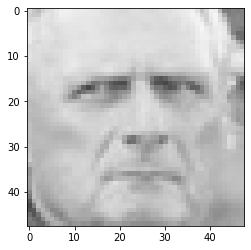

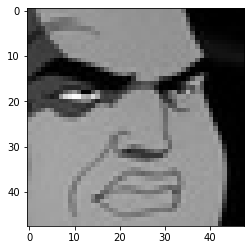

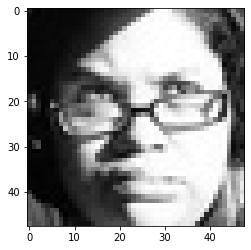

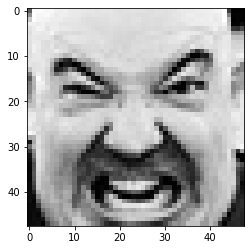

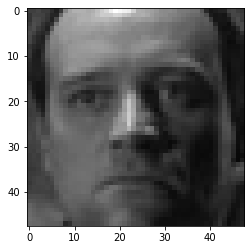

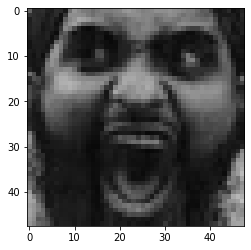

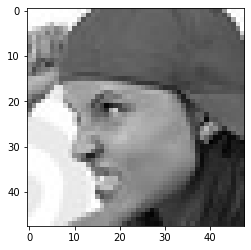

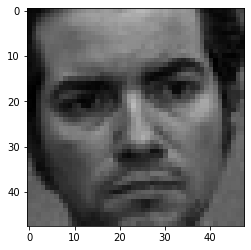

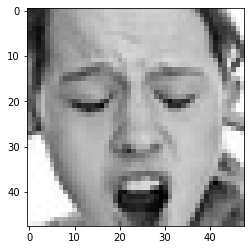

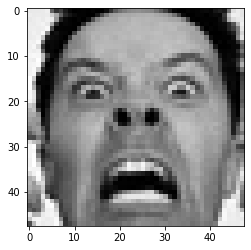

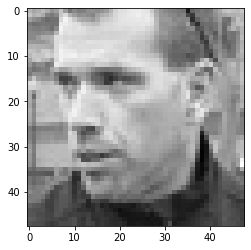

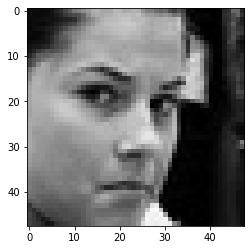

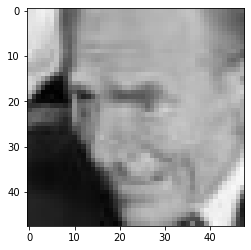

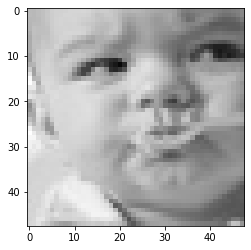

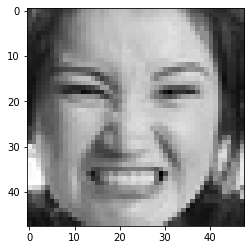

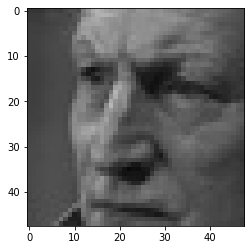

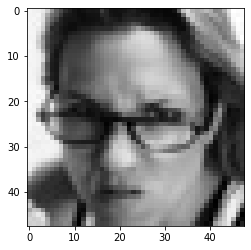

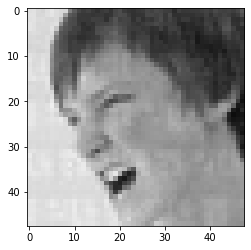

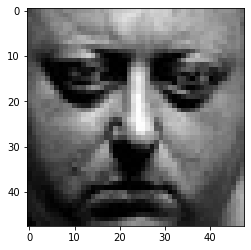

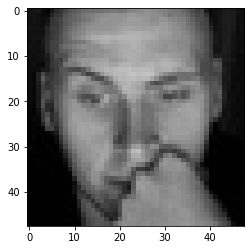

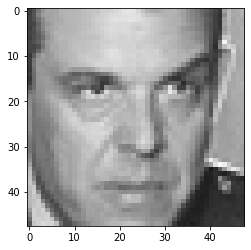

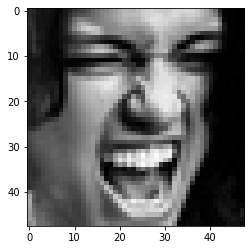

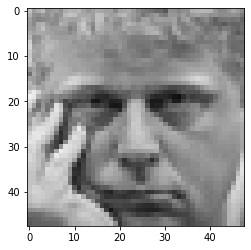

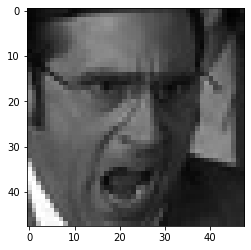

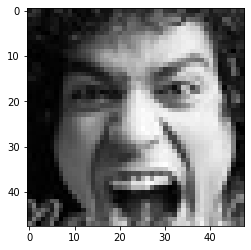

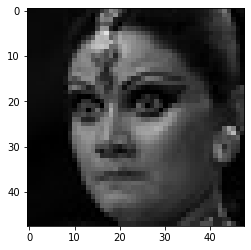

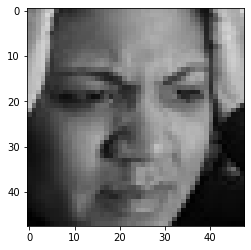

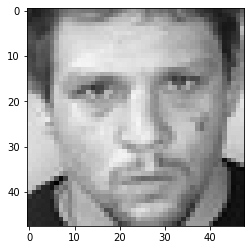

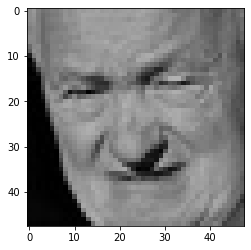

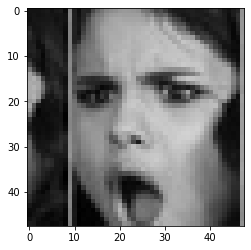

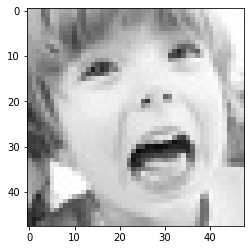

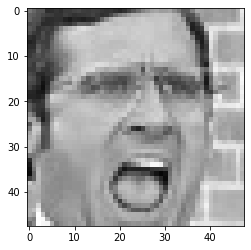

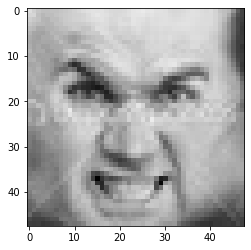

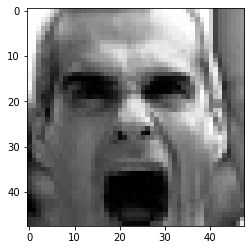

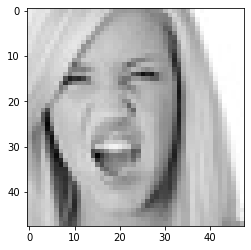

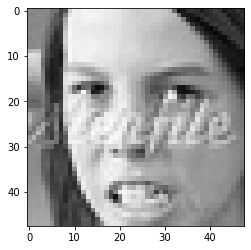

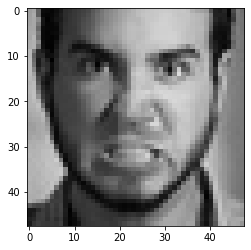

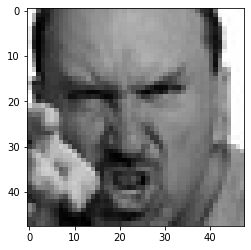

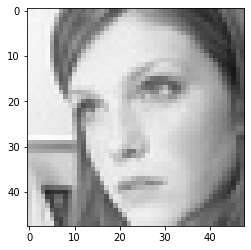

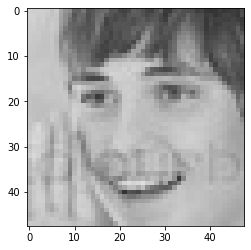

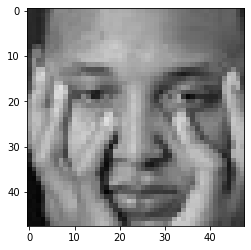

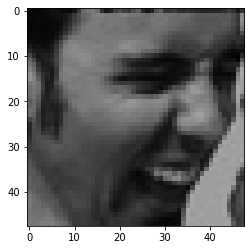

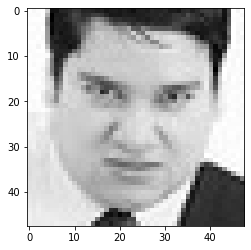

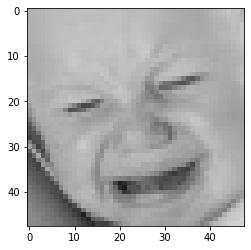

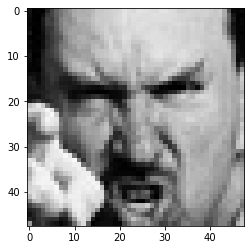

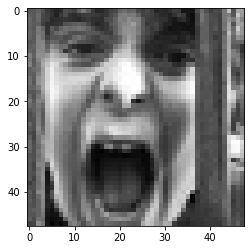

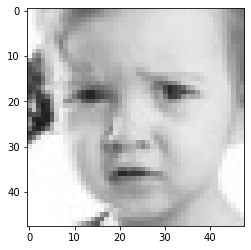

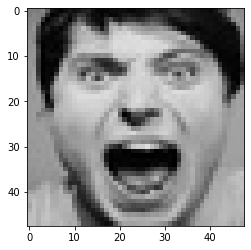

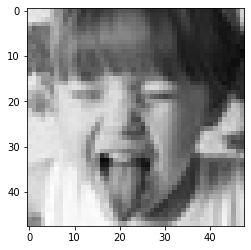

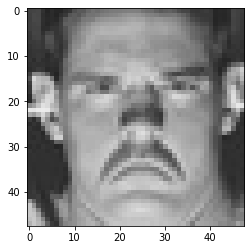

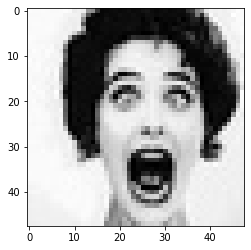

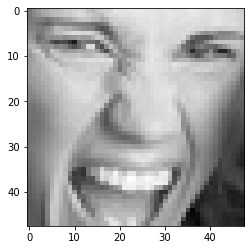

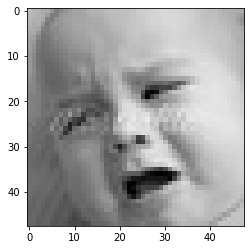

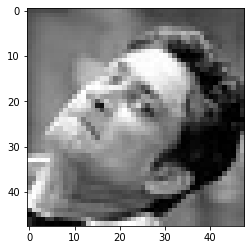

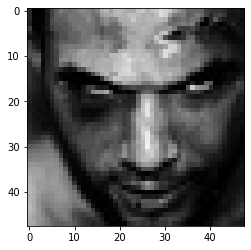

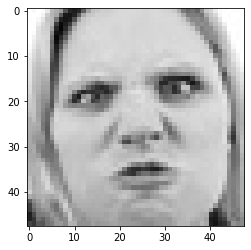

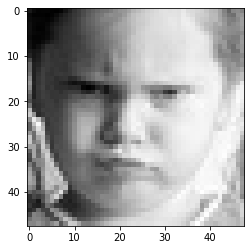

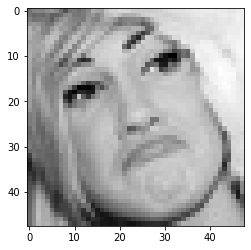

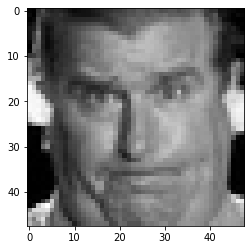

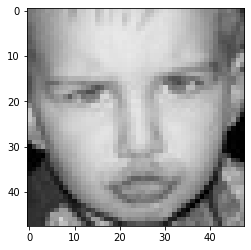

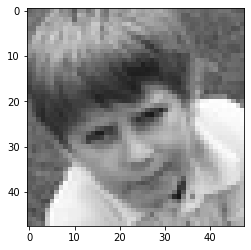

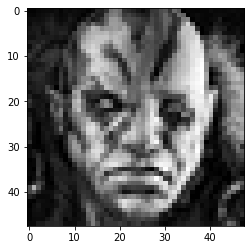

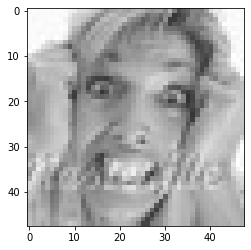

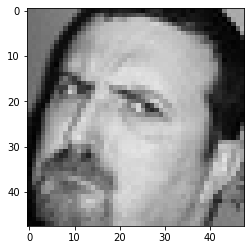

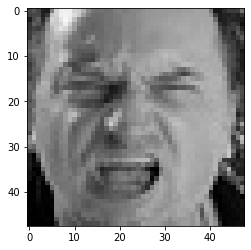

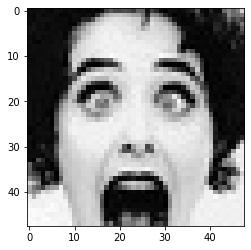

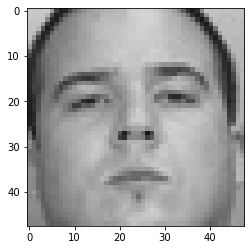

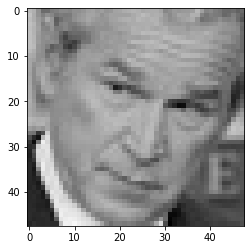

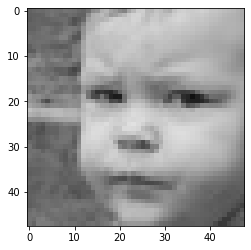

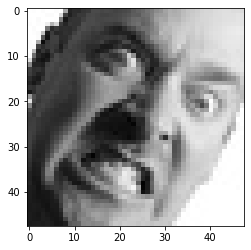

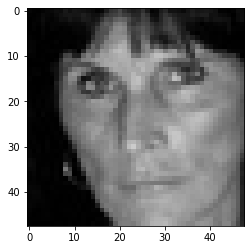

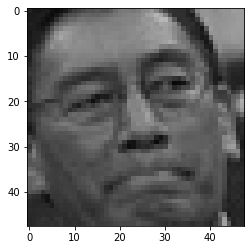

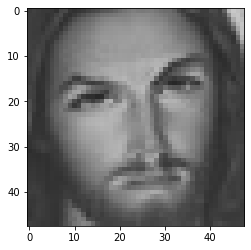

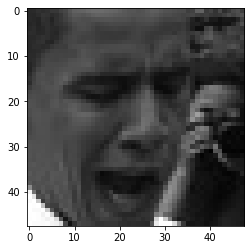

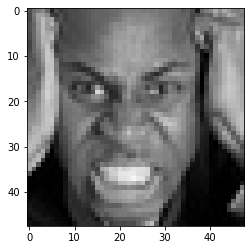

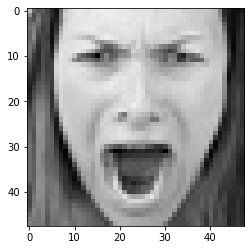

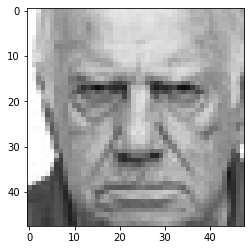

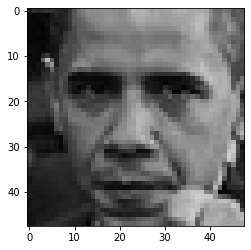

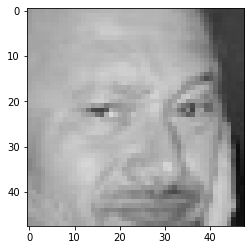

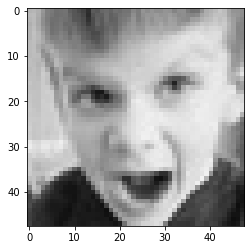

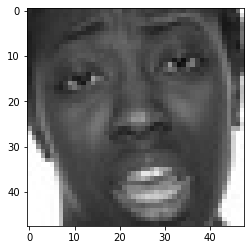

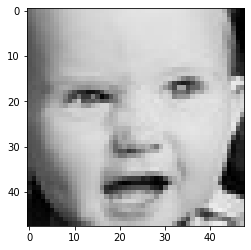

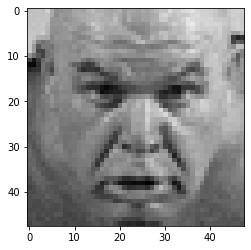

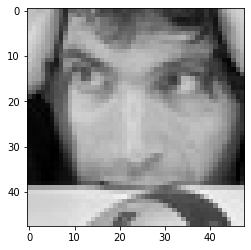

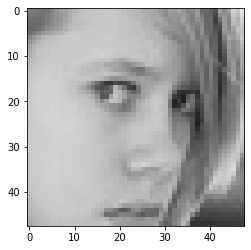

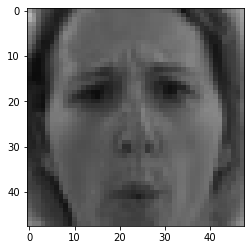

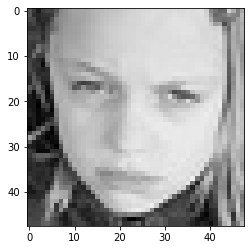

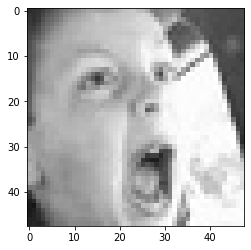

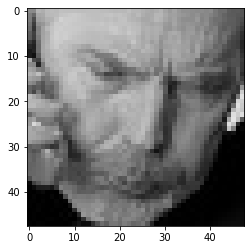

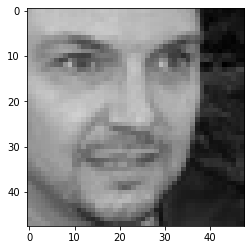

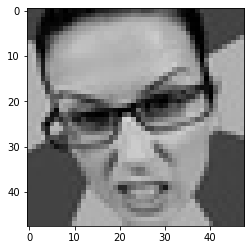

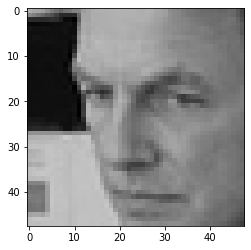

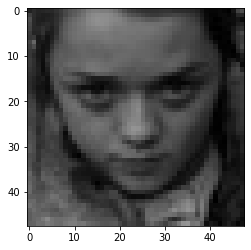

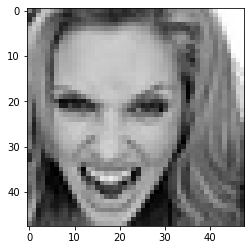

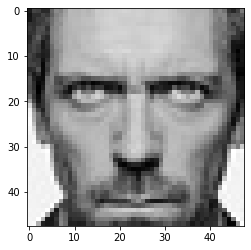

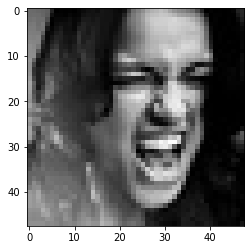

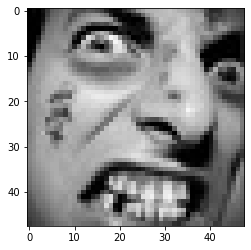

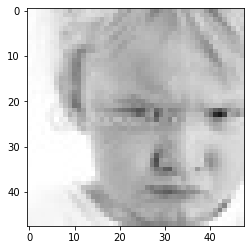

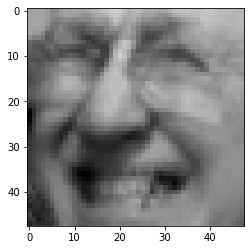

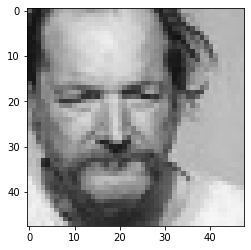

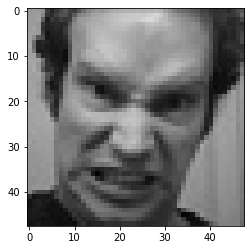

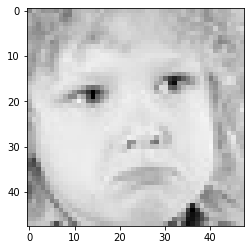

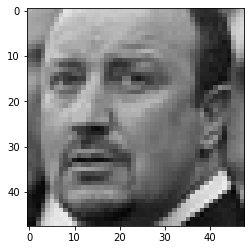

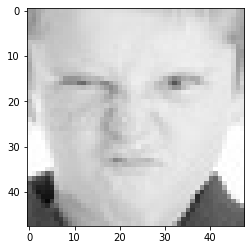

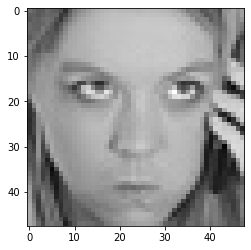

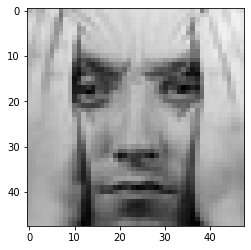

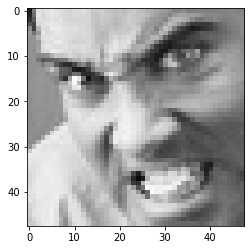

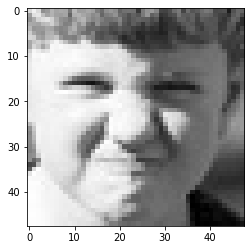

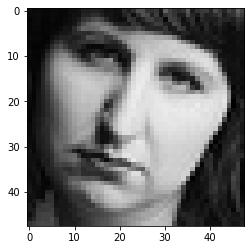

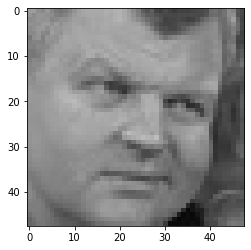

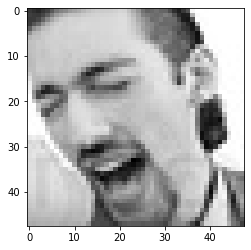

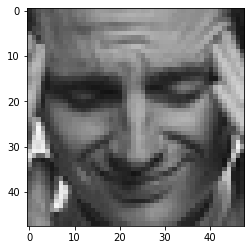

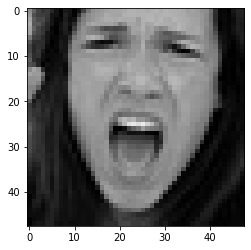

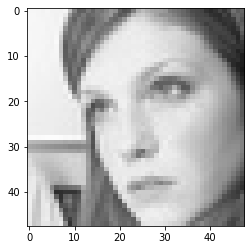

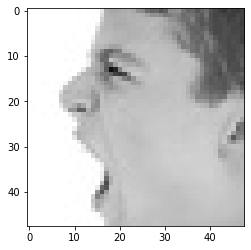

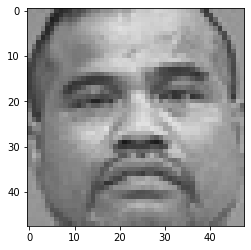

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [9]:
for emotion in Classes:
    path = os.path.join(Datadirectory, emotion)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plot.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plot.show()
        

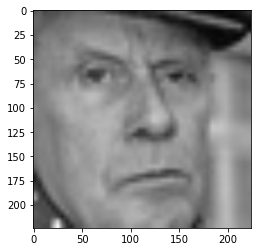

In [8]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plot.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plot.show()

In [9]:
new_array.shape 

(224, 224, 3)

In [10]:
train_DataSet = []

def create_train_DataSet():
    for emotion in Classes:
        path = os.path.join(Datadirectory, emotion)
        class_num = Classes.index(emotion)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                train_DataSet.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_train_DataSet()

In [12]:
print(len(train_DataSet))

3288


In [13]:
import random

random.shuffle(train_DataSet)

In [14]:
X = []
Y = []

for feature, label in train_DataSet:
    X.append(feature)
    Y.append(label)
    
X = npy.array(X).reshape(-1, img_size, img_size, 3)

In [15]:
X.shape

(3288, 224, 224, 3)

In [16]:
y = npy.array(Y)

In [17]:
X = X/255.0

In [18]:
Y[1000]

5

In [19]:
import tensorflow as tenFlow
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tenFlow.keras.applications.MobileNetV2()

In [21]:
base_input = model.layers[0].input

In [22]:
base_output = model.layers[-2].output

In [23]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [24]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [27]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [28]:
new_model.fit(X, y, epochs = 35)

Epoch 1/35
103/103 [==============================] - 157s 1s/step - loss: 1.6469 - accuracy: 0.3452
Epoch 2/35
103/103 [==============================] - 154s 1s/step - loss: 1.3490 - accuracy: 0.4754
Epoch 3/35
103/103 [==============================] - 153s 1s/step - loss: 1.1848 - accuracy: 0.5420
Epoch 4/35
103/103 [==============================] - 153s 1s/step - loss: 1.0452 - accuracy: 0.6071
Epoch 5/35
103/103 [==============================] - 153s 1s/step - loss: 0.9450 - accuracy: 0.6484
Epoch 6/35
103/103 [==============================] - 155s 2s/step - loss: 0.8362 - accuracy: 0.6959
Epoch 7/35
103/103 [==============================] - 154s 1s/step - loss: 0.7675 - accuracy: 0.7184
Epoch 8/35
103/103 [==============================] - 152s 1s/step - loss: 0.6711 - accuracy: 0.7476
Epoch 9/35
103/103 [==============================] - 153s 1s/step - loss: 0.5887 - accuracy: 0.7850
Epoch 10/35
103/103 [==============================] - 154s 1s/step - loss: 0.5059 - accura

In [29]:
new_model.save('Final_model_95p07.h5')

C:\Users\anash\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [30]:
new_model = tenFlow.keras.models.load_model('Final_model_95p07.h5')

In [31]:
image = cv2.imread('happyBOI2.jpg')

In [32]:
image.shape

(225, 225, 3)

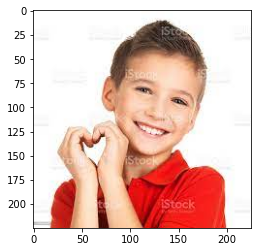

In [33]:
plot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [34]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [36]:
gray.shape

(225, 225)

In [37]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    faces2 = faceCascade.detectMultiScale(roi_gray)
    if len(faces2) == 0:
        print("Face is not detected")
    else:
        for (ex, ey, ew, eh) in faces2:
            face_roi = roi_color[ey: ey+eh, ex: ex + ew]

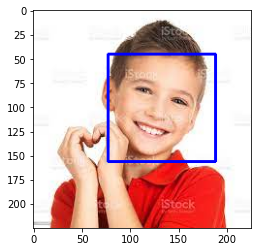

In [38]:
plot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [41]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = npy.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

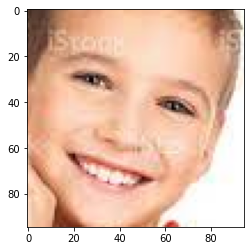

In [42]:
plot.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [43]:
predictions = new_model.predict(final_image)

In [44]:
predictions[0]

array([2.0445439e-05, 7.0252776e-10, 6.0767007e-08, 2.7123067e-06,
       9.9995208e-01, 2.3521607e-05, 1.1913982e-06], dtype=float32)

In [45]:
npy.argmax(predictions)

4

In [47]:
import cv2
import numpy as npy

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)

img = npy.zeros((500, 500))

text = "some text in a box!"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width +2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        faces2 = faceCascade.detectMultiScale(roi_gray)
        if len(faces2) == 0:
            print("Face is not detected")
        else:
            for (ex, ey, ew, eh) in faces2:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
    
    final_image = cv2.resize(face_roi, (224, 224))
    final_image = npy.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (npy.argmax(Predictions) == 0):
        status = "Angry"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 1):
        status = "Disgust"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif (npy.argmax(Predictions) == 2):
        status = "Fear"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 3):
        status = "Happy"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 4):
        status = "Sad"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (npy.argmax(Predictions) == 5):
        status = "Surpise"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    else:
        status = "Neutral"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        cv2. rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destoryAllWindows()

Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not detected
Face is not d

KeyboardInterrupt: 